In [4]:
import sys
!{sys.executable} -m pip install vaderSentiment

  Using cached https://files.pythonhosted.org/packages/44/a3/1218a3b5651dbcba1699101c84e5c84c36cbba360d9dbf29f2ff18482982/vaderSentiment-3.3.1-py2.py3-none-any.whl


In [6]:
import sys
!{sys.executable} -m pip install nltk

  Using cached https://files.pythonhosted.org/packages/0f/fa/a9e3ad47c189969e3233031187b323fe20005fee4bfc8edcb24f8ffbe540/regex-2020.4.4-cp37-cp37m-manylinux2010_x86_64.whl


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from os import path
from PIL import Image
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import rcParams
import multiprocessing as mp
import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer
from nltk import word_tokenize
from nltk.util import ngrams
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#% matplotlib inline

In [5]:
filename = ['sentiment_gr_category/sentiment_gr_category_{}.tsv'.format(k) for k in range(1,101)]
for file in filename:
    with open(file, 'r') as f:
        next(f)
        with open('sentiment_gr_positive.tsv','a') as p:
            with open('sentiment_gr_negative.tsv','a') as n:
                with open('sentiment_gr_neutral.tsv','a') as neu:
                    for i,line in enumerate(f):
                        text = line.strip().split('\t')
                        cleaned_text = text[2]
                        review_category = text[4]
                        overall = text[0]
                        if review_category == 'positive':
                            p.write(overall + '\t' + cleaned_text + '\n' )
                        elif review_category == 'negative':
                            n.write(overall + '\t' + cleaned_text + '\n' )
                        elif review_category == 'neutral':
                            neu.write(overall +'\t'+ cleaned_text + '\n' )

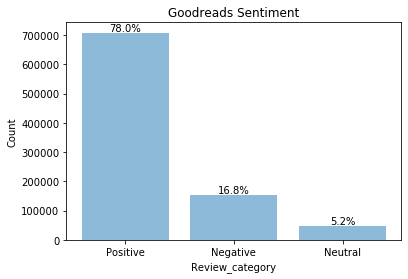

In [31]:
#from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots()
#formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))
#ax.yaxis.set_major_formatter(formatter)
def count(filename):
    count = 0
    with open(filename,'r') as f:
        for line in f:
            count += 1
    return count
num_positive = count('sentiment_gr_positive.tsv')
num_negative = count('sentiment_gr_negative.tsv')
num_neutral = count('sentiment_gr_neutral.tsv')
objects = ('Positive', 'Negative', 'Neutral')
y_pos = np.arange(len(objects))
performance = [num_positive, num_negative, num_neutral]

rects1 = plt.bar(y_pos, performance, align='center', alpha=0.5)
for rect in rects1:
    height = rect.get_height()
    percent = (height/(num_positive+num_negative+num_neutral))*100
    ax.text(rect.get_x() + rect.get_width()/2., 1*height,
            '%.1f' % percent + "%", ha='center', va='bottom')
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.xlabel('Review_category')
plt.title('Goodreads Sentiment')
plt.show()


In [7]:
num_positive

707418

In [8]:
num_negative

152562

In [30]:
num_neutral

46758

# ----------------------------------------------------------

In [9]:
# Split the sentiment_gr_positive.tsv file 
import os

n = 707418 # number of reviews in the file
N = 40  # spliting to 20 files
k = 0

n_per_file = int(n // N) + 1

with open('sentiment_gr_positive.tsv', 'r') as f:
    next(f)
    g = None
    for i, line in enumerate(f):
        if i % n_per_file == 0:
            k = k + 1
            if not g == None:
                g.close()
            g = open('sentiment_gr_positive/sentiment_gr_positive_{}.tsv'.format(k), 'w')
            g.write("cleaned_text_positive\n")
        g.write("{}".format(line))
    g.close()

In [10]:
# Split the sentiment_gr_negative.tsv file 
import os

n = 152562 # number of reviews in the file
N = 20  # spliting to 100 files
k = 0

n_per_file = int(n // N) + 1

with open('sentiment_gr_negative.tsv', 'r') as f:
    next(f)
    g = None
    for i, line in enumerate(f):
        if i % n_per_file == 0:
            k = k + 1
            if not g == None:
                g.close()
            g = open('sentiment_gr_negative/sentiment_gr_negative_{}.tsv'.format(k), 'w')
            g.write("cleaned_text_negative\n")
        g.write("{}".format(line))
    g.close()

In [25]:
def graph(category, ngram, data):
    rcParams['font.family'] = 'sans-serif'
    rcParams['font.sans-serif'] = ['DejaVu Sans']
    fig, ax = plt.subplots(figsize=(15, 12))
    #rcParams['figure.figsize'] = 15,12
    sns.barplot(y='words',x='freq',data=data,color= 'cyan')
    plt.ylabel('Words', size = 15)
    plt.xlabel('Frequency', size = 15)
    title = 'Goodreads ' + category + 'Review ' + ngram + 'Top 50'
    plt.title(title, size = 20, weight = 'bold')
    #plt.xlim([0,900000])
    #ax.tick_params(labelsize = 10)

    #xticks = [100000,200000,300000,400000,500000,600000,700000,800000,900000]
    #replace_x_ticks = ['100k','200k','300k','400k','500k','600k', '700k', '800k']
    #plt.xticks(xticks, replace_x_ticks)

# -------------------------------------------------------
# Unigram

In [6]:
positive = pd.read_csv('sentiment_gr_positive_unigram.csv')

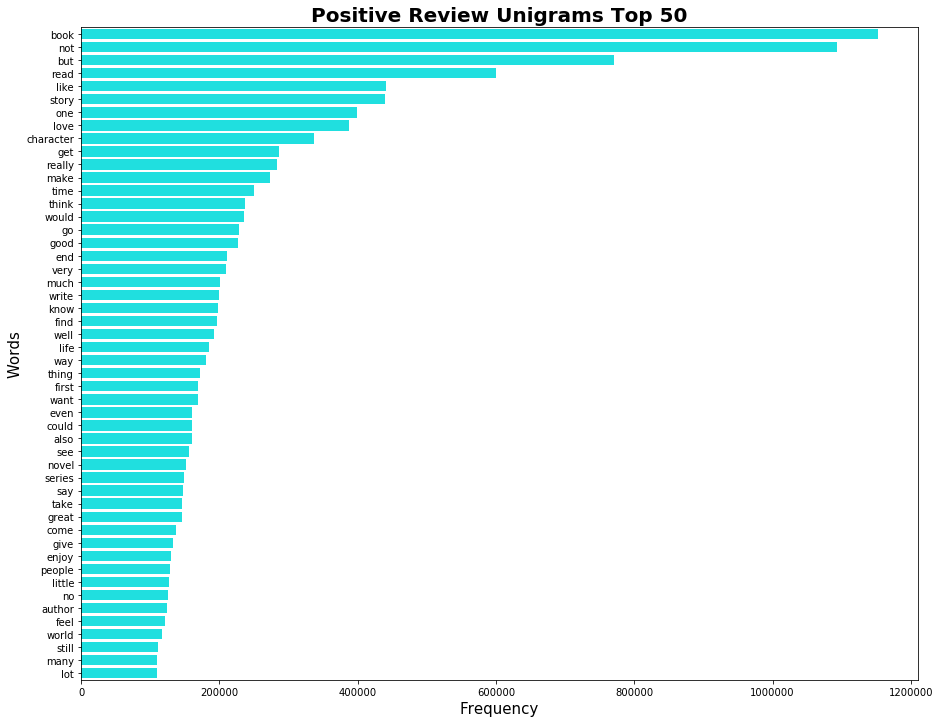

In [7]:
graph('Positive ', 'Unigrams ', positive)

In [8]:
negative = pd.read_csv('sentiment_gr_negative_unigram.csv')

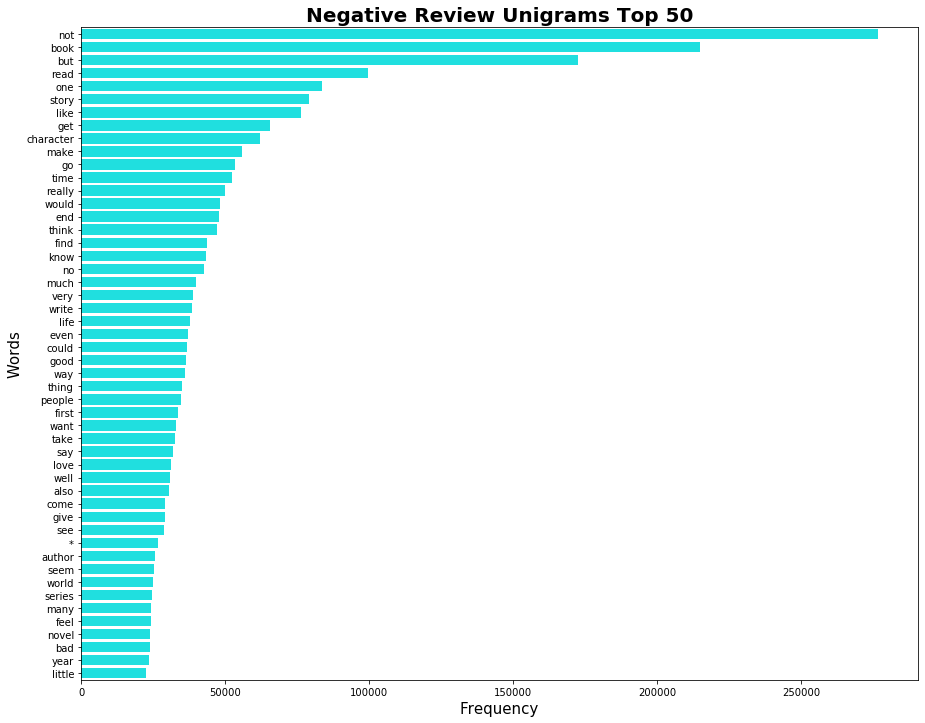

In [9]:
graph('Negative ', 'Unigrams ', negative)

In [13]:
positive_bigram= pd.read_csv('sentiment_gr_positive_bigram.csv')

In [14]:
positive_bigram

,words,freq
0,"('but', 'not')",80135
1,"('read', 'book')",65651
2,"('*', '*')",54247
3,"('could', 'not')",51025
4,"('book', 'not')",45485
5,"('love', 'book')",38054
6,"('book', 'but')",35780
7,"('not', 'know')",35407
8,"('main', 'character')",35291
9,"('not', 'really')",32306


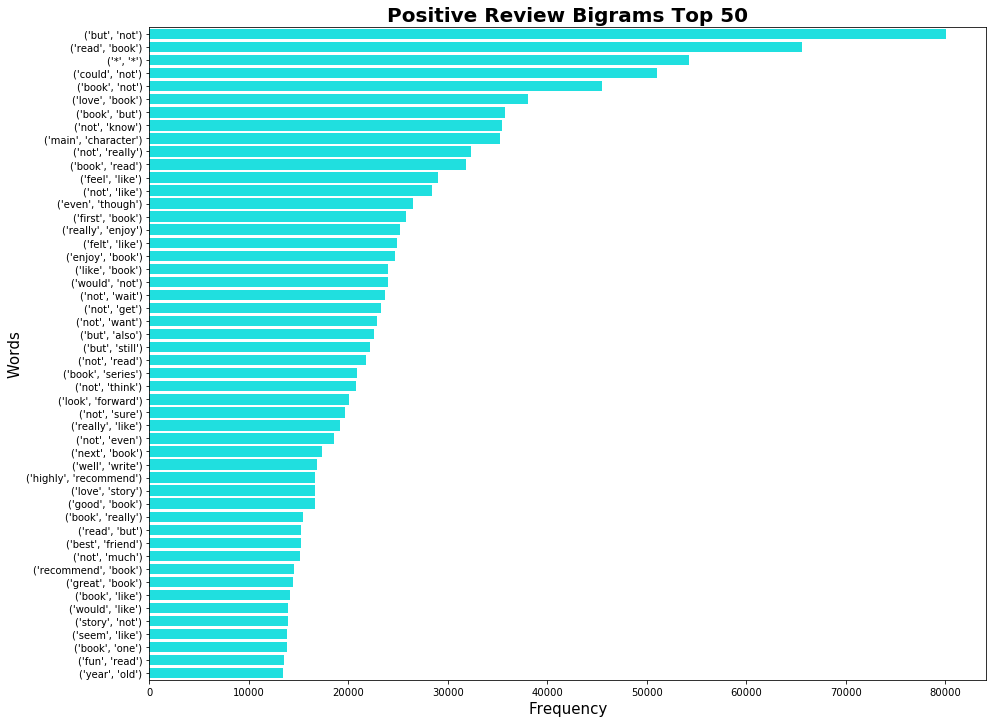

In [16]:
graph('Positive ', 'Bigrams ', positive_bigram)

In [17]:
negative_bigram= pd.read_csv('sentiment_gr_negative_bigram.csv')

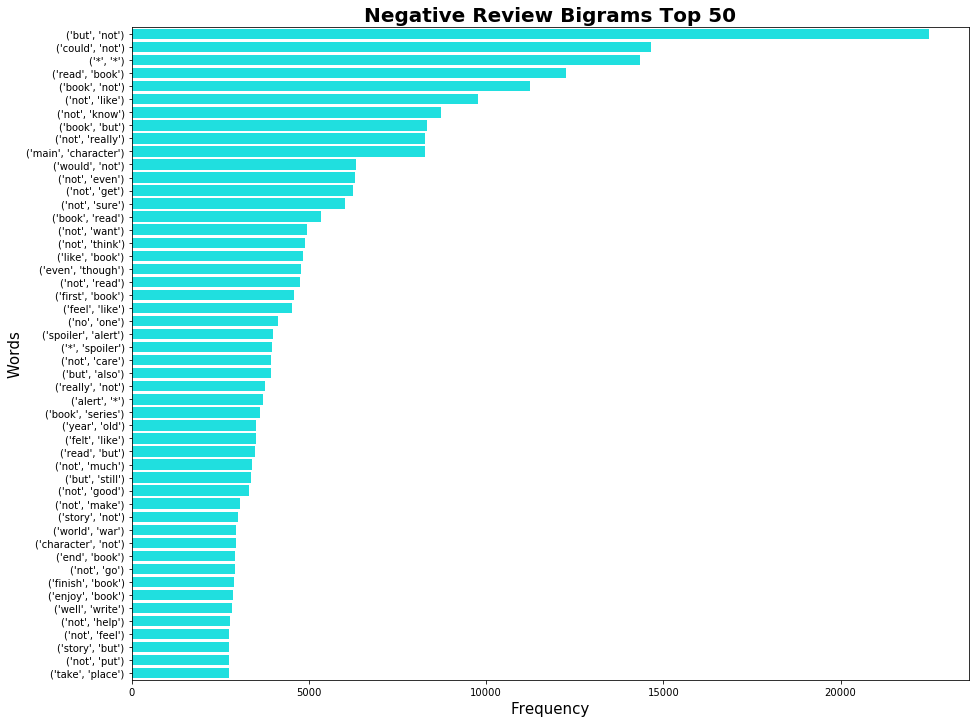

In [18]:
graph('Negative ', 'Bigrams ', negative_bigram)

# -------------------------------------------
## TRIGRAM

In [61]:
positive_trigram = pd.read_csv('sentiment_gr_positive_trigram.csv')

In [62]:
positive_trigram = positive_trigram[5:55]

In [63]:

positive_trigram['words']=positive_trigram['words'].astype(str).apply(lambda st: st[st.find("(")+1:st.find(")")]).str.replace('\'','').str.replace(',','_')
positive_trigram

,words,freq
5,could_ not_ put,10226
6,really_ enjoy_ book,7573
7,not_ wait_ read,6859
8,look_ forward_ read,6294
9,not_ help_ but,6294
10,book_ but_ not,4572
11,exchange_ honest_ review,4411
12,but_ could_ not,4280
13,could_ not_ get,4259
14,book_ ever_ read,4008


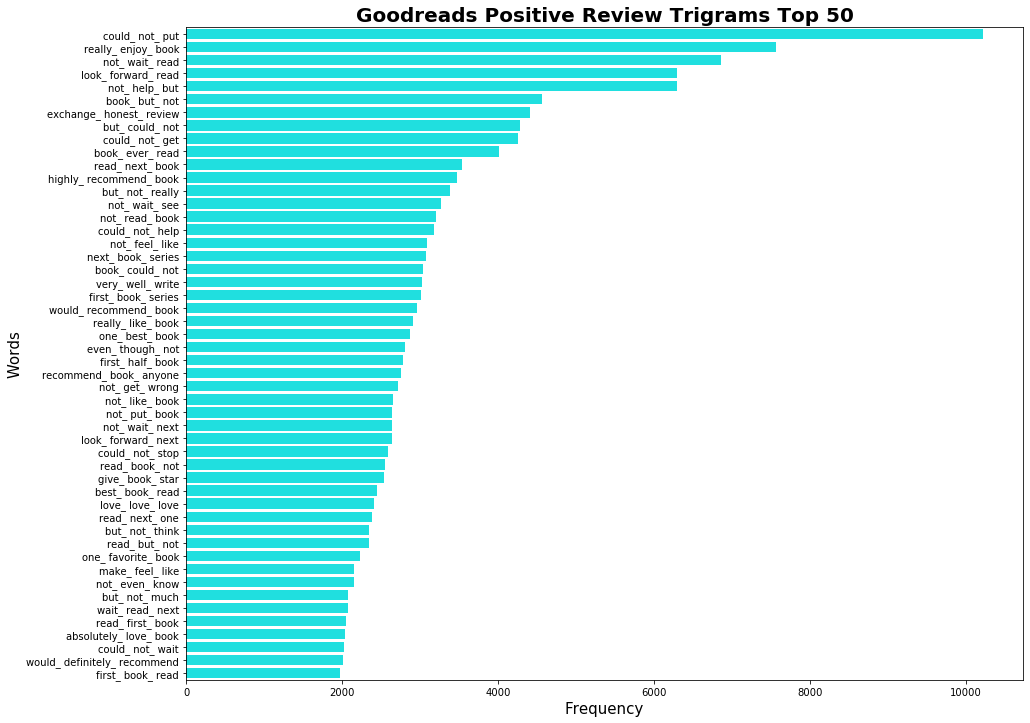

In [75]:
graph('Positive ', 'Trigrams ', positive_trigram)

In [71]:
negative_trigram = pd.read_csv('sentiment_gr_negative_trigram.csv')
negative_trigram

,words,freq
0,"('*', '*', '*')",4769
1,"('*', '*', 'spoiler')",3832
2,"('spoiler', 'alert', '*')",3690
3,"('*', 'spoiler', 'alert')",3685
4,"('alert', '*', '*')",3653
5,"('could', 'not', 'put')",2083
6,"('could', 'not', 'get')",1650
7,"('but', 'could', 'not')",1440
8,"('book', 'but', 'not')",1428
9,"('not', 'help', 'but')",1412


In [72]:
negative_trigram = negative_trigram.drop(negative_trigram.index[37])
negative_trigram = negative_trigram[5:55]

In [73]:
negative_trigram['words']=negative_trigram['words'].astype(str).apply(lambda st: st[st.find("(")+1:st.find(")")]).str.replace('\'','').str.replace(',','_')
negative_trigram

,words,freq
5,could_ not_ put,2083
6,could_ not_ get,1650
7,but_ could_ not,1440
8,book_ but_ not,1428
9,not_ help_ but,1412
10,not_ like_ book,1168
11,world_ war_ ii,1034
12,book_ ever_ read,942
13,but_ not_ really,889
14,would_ not_ recommend,813


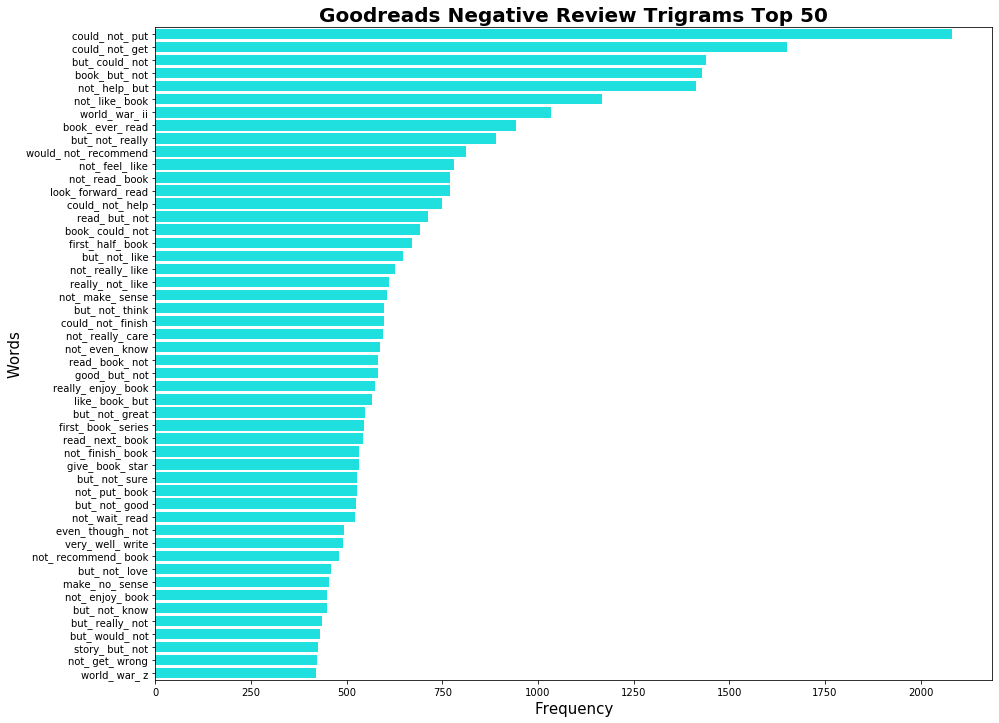

In [76]:
graph('Negative ', 'Trigrams ', negative_trigram)